# **Image Processing: Expt 7 Edge Detection**

Name: Nabila Tajrin Bristy


**AIM: Implement and study the effect of Different Mask (Sobel, Prewitt and Roberts)**\

Edges are significant local changes of intensity in a digital image. An edge can be defined as
a set of connected pixels that forms a boundary between two disjoint regions. There are
three types of edges:

*   Horizontal edges
*   Vertical edges
*   Diagonal edges

Sobel, Prewitt, and Roberts operators are popular edge detection methods used in image
processing. They highlight regions of rapid intensity change (edges) in images, often used
as a precursor for feature extraction in various computer vision tasks. Each operator works
by convolving the image with specific kernels that compute gradients in horizontal and
vertical directions, detecting edges accordingly.

## **STEP 1: IMPORT LIBRARIES**

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


## **STEP 2: LOAD AND DISPLAY THE IMAGE**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


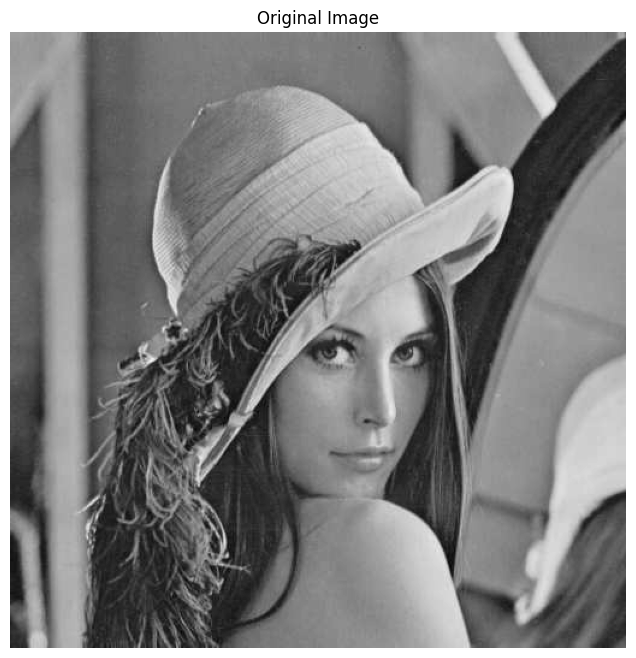

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the image in grayscale
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/dataset/lena.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


## **STEP 3: APPLY SOBEL OPERATOR**

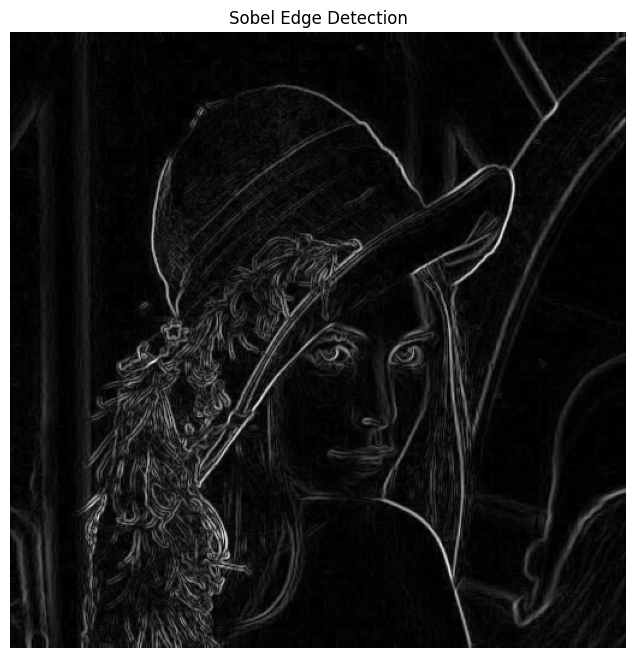

In [4]:
# Apply Sobel operator in the X and Y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Display the Sobel edge-detected image
plt.figure(figsize=(8, 8))
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


## **STEP 4: APPLY PREWITT OPERATOR**

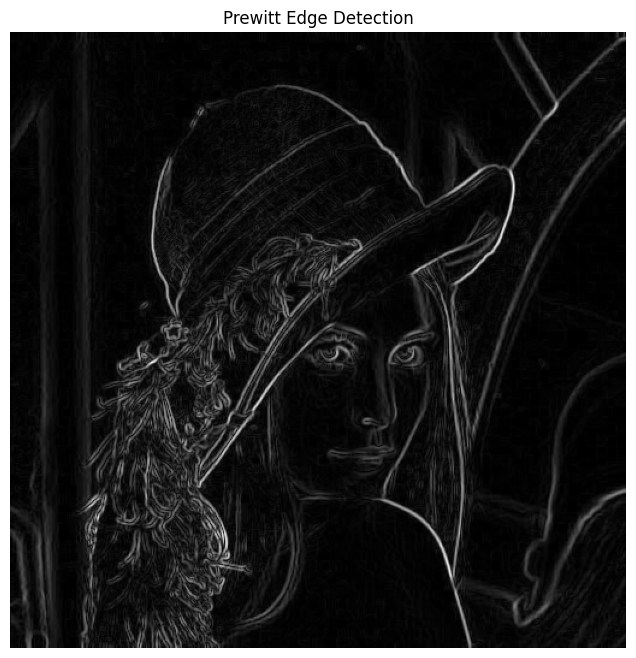

In [5]:
# Prewitt operator kernels (simplified)
prewitt_x = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# Apply the Prewitt operator in X and Y directions
prewitt_edge_x = cv2.filter2D(image, cv2.CV_64F, prewitt_x)  # Change -1 to cv2.CV_64F
prewitt_edge_y = cv2.filter2D(image, cv2.CV_64F, prewitt_y)  # Change -1 to cv2.CV_64F

# Calculate the gradient magnitude
prewitt_edge = cv2.magnitude(prewitt_edge_x, prewitt_edge_y)

# Display the Prewitt edge-detected image
plt.figure(figsize=(8, 8))
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()

## **STEP 5: APPLY ROBERTS OPERATOR**

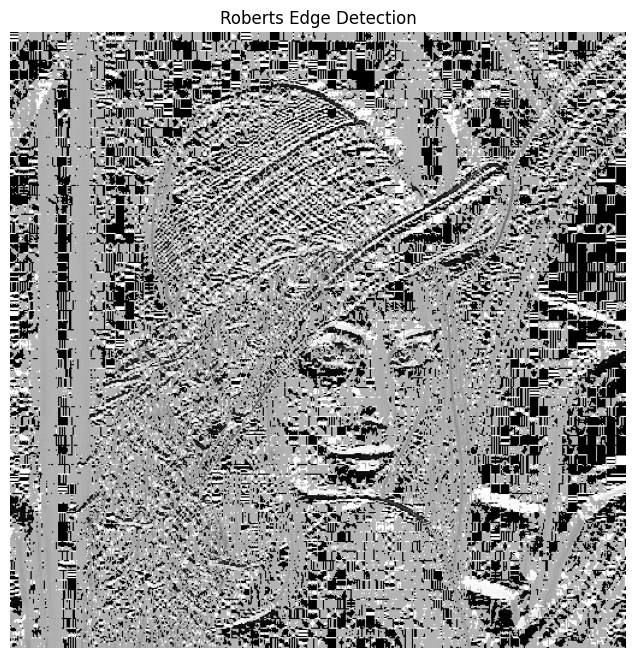

In [6]:
# Roberts Cross operator kernels
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

# Apply the Roberts operator using convolution
roberts_edge_x = ndimage.convolve(image, roberts_x)
roberts_edge_y = ndimage.convolve(image, roberts_y)

# Calculate the gradient magnitude
roberts_edge = np.hypot(roberts_edge_x, roberts_edge_y)

# Display the Roberts edge-detected image
plt.figure(figsize=(8, 8))
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')
plt.show()


## **STEP 6: COMPARE ALL RESULTS**

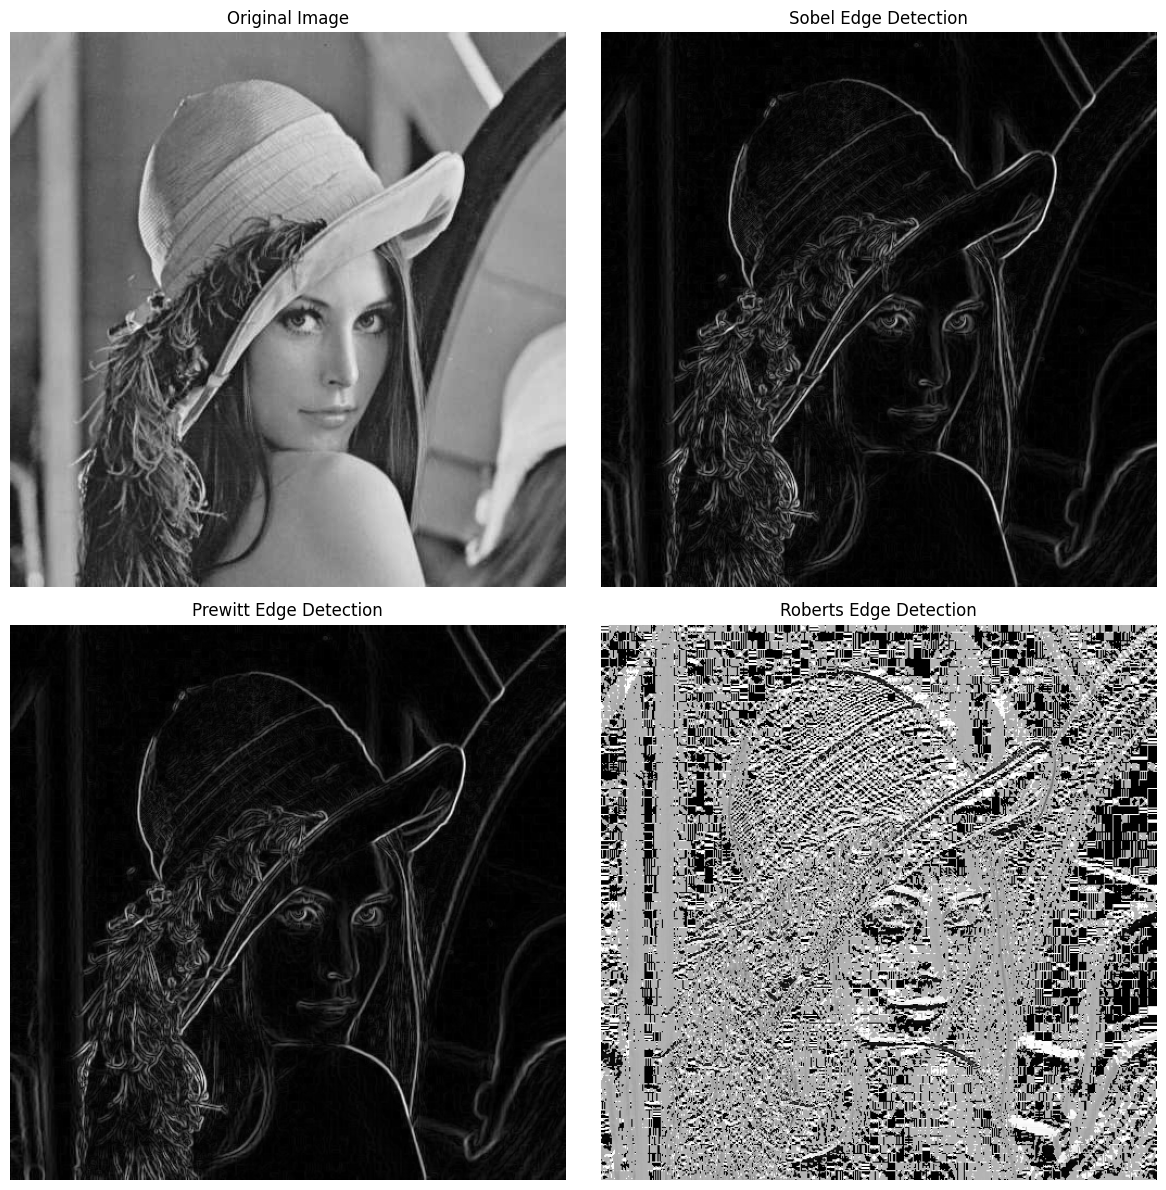

In [7]:
# Display the original image and edge-detected results side by side
plt.figure(figsize=(12, 12))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sobel edge detection
plt.subplot(2, 2, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

# Prewitt edge detection
plt.subplot(2, 2, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

# Roberts edge detection
plt.subplot(2, 2, 4)
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


## **STEP 7: ANALYSIS**

In [8]:
# Analysis and Conclusion

# Compare results based on visual observations and characteristics of each operator

# Function to display textual analysis for each operator
def display_analysis():
    analysis_text = """
    Sobel Operator:
    - The Sobel operator produces relatively smooth and clear edge-detection results.
    - It reduces noise better than the others due to its smoothing nature.
    - Effective for detecting edges with more clarity and less sensitivity to noise.

    Prewitt Operator:
    - The Prewitt operator is simpler and computationally cheaper, making it faster than Sobel.
    - However, it may be more sensitive to noise and does not provide as precise edge detection.
    - Edges might not be as clear as Sobel, especially in noisy images.

    Roberts Operator:
    - The Roberts operator is the fastest but produces less accurate edge detection results.
    - It is more sensitive to noise and may show more noise, especially in areas with gradual intensity changes.
    - While faster, it is less suitable for detecting smooth edges in complex images.
    """
    print(analysis_text)

# Call the function to display analysis
display_analysis()



    Sobel Operator:
    - The Sobel operator produces relatively smooth and clear edge-detection results.
    - It reduces noise better than the others due to its smoothing nature.
    - Effective for detecting edges with more clarity and less sensitivity to noise.

    Prewitt Operator:
    - The Prewitt operator is simpler and computationally cheaper, making it faster than Sobel.
    - However, it may be more sensitive to noise and does not provide as precise edge detection.
    - Edges might not be as clear as Sobel, especially in noisy images.

    Roberts Operator:
    - The Roberts operator is the fastest but produces less accurate edge detection results.
    - It is more sensitive to noise and may show more noise, especially in areas with gradual intensity changes.
    - While faster, it is less suitable for detecting smooth edges in complex images.
    


## **STEP 8: PERFORMANCE COMPARISON**

In [9]:
# Performance comparison: Measure the execution time for each operator
import time
import cv2
import numpy as np
from scipy import ndimage

# Measure the time for Sobel
start_time = time.time()
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
sobel_time = time.time() - start_time

# Measure the time for Prewitt
start_time = time.time()
prewitt_edge_x = cv2.filter2D(image, cv2.CV_64F, prewitt_x) # Change data type to cv2.CV_64F
prewitt_edge_y = cv2.filter2D(image, cv2.CV_64F, prewitt_y) # Change data type to cv2.CV_64F
prewitt_edge = cv2.magnitude(prewitt_edge_x, prewitt_edge_y)
prewitt_time = time.time() - start_time

# Measure the time for Roberts
start_time = time.time()
roberts_edge_x = ndimage.convolve(image, roberts_x)
roberts_edge_y = ndimage.convolve(image, roberts_y)
roberts_edge = np.hypot(roberts_edge_x, roberts_edge_y)
roberts_time = time.time() - start_time

# Display execution times
print(f"Sobel execution time: {sobel_time:.4f} seconds")
print(f"Prewitt execution time: {prewitt_time:.4f} seconds")
print(f"Roberts execution time: {roberts_time:.4f} seconds")


Sobel execution time: 0.0042 seconds
Prewitt execution time: 0.0086 seconds
Roberts execution time: 0.0282 seconds


## **STEP 9: VISUAL COMPARISON (Side-by-Side Results)**

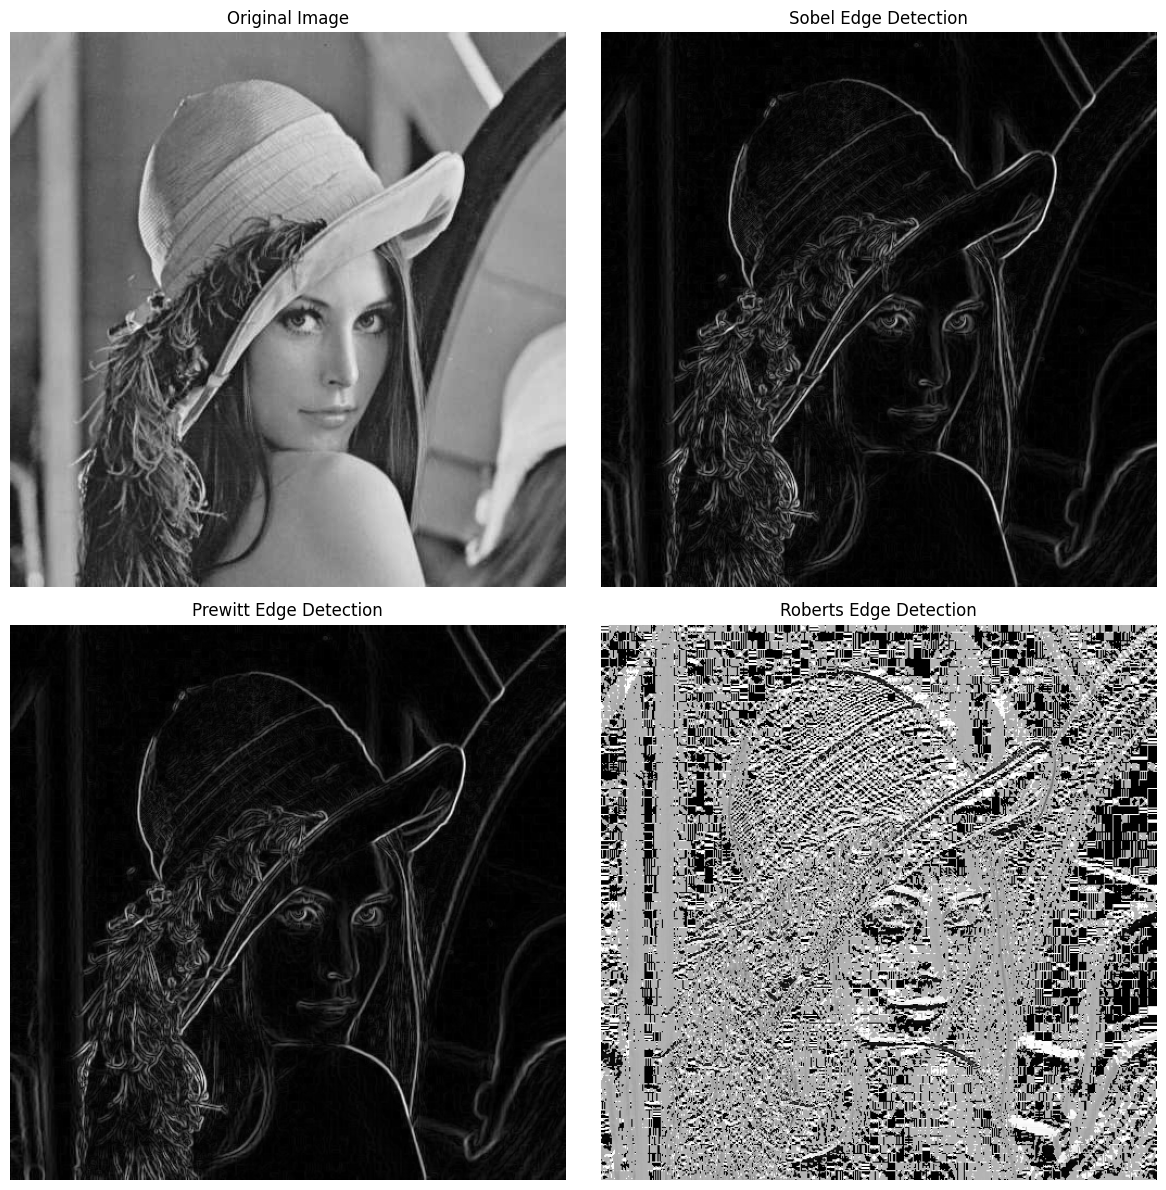

In [10]:
# Display side-by-side visual comparison for edge detection using Sobel, Prewitt, and Roberts

plt.figure(figsize=(12, 12))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sobel edge detection
plt.subplot(2, 2, 2)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

# Prewitt edge detection
plt.subplot(2, 2, 3)
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

# Roberts edge detection
plt.subplot(2, 2, 4)
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


## **STEP 10: NOISE HANDLING**

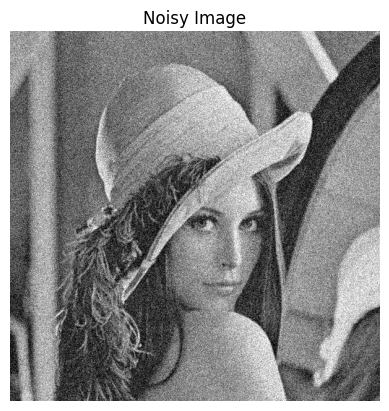

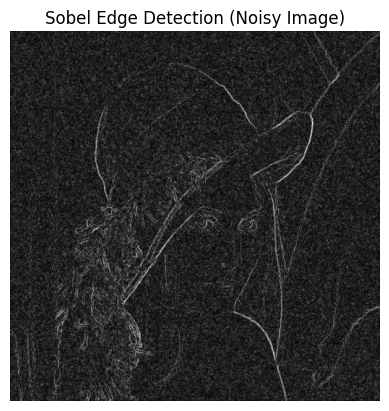

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise to the image
def add_noise(image, mean=0, sigma=25):
    row, col = image.shape
    gaussian_noise = np.random.normal(mean, sigma, (row, col))
    noisy_image = np.uint8(np.clip(image + gaussian_noise, 0, 255))
    return noisy_image

# Load the original image (grayscale)
# Make sure 'image.jpg' is in the current working directory or provide the full path
image_path = '/content/drive/My Drive/Colab Notebooks/dataset/lena.jpg'  # Replace with the actual path to your image if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image '{image_path}'. Please check the file path.")
    exit()

# Add Gaussian noise
noisy_image = add_noise(image)

# Display noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

# Perform edge detection on the noisy image using Sobel operator
sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Display edge detection result after adding noise
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection (Noisy Image)')
plt.axis('off')
plt.show()

## **STEP 11: EDGE STRENGTH**

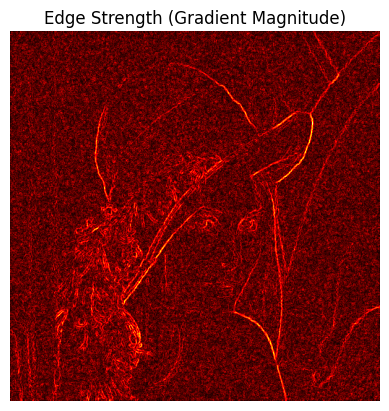

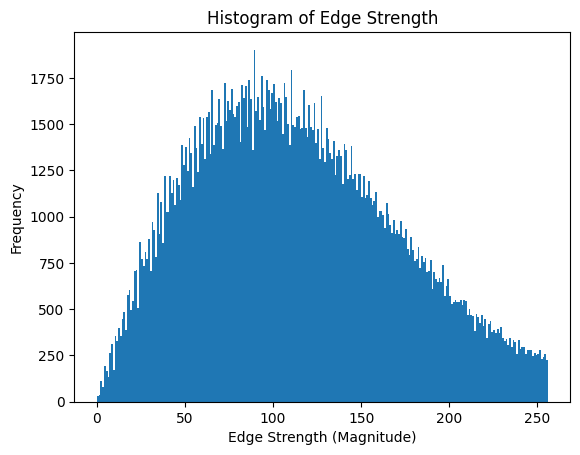

In [3]:
# Function to calculate edge strength using gradient magnitude
def compute_edge_strength(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = cv2.magnitude(sobel_x, sobel_y)
    return magnitude

# Calculate edge strength for the noisy image using Sobel operator
edge_strength = compute_edge_strength(noisy_image)

# Visualize the edge strength (gradient magnitude)
plt.imshow(edge_strength, cmap='hot')
plt.title('Edge Strength (Gradient Magnitude)')
plt.axis('off')
plt.show()

# Optionally, compute histograms to analyze edge intensity distribution
plt.hist(edge_strength.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Edge Strength')
plt.xlabel('Edge Strength (Magnitude)')
plt.ylabel('Frequency')
plt.show()


## **STEP 12: PARAMETER TUNING**

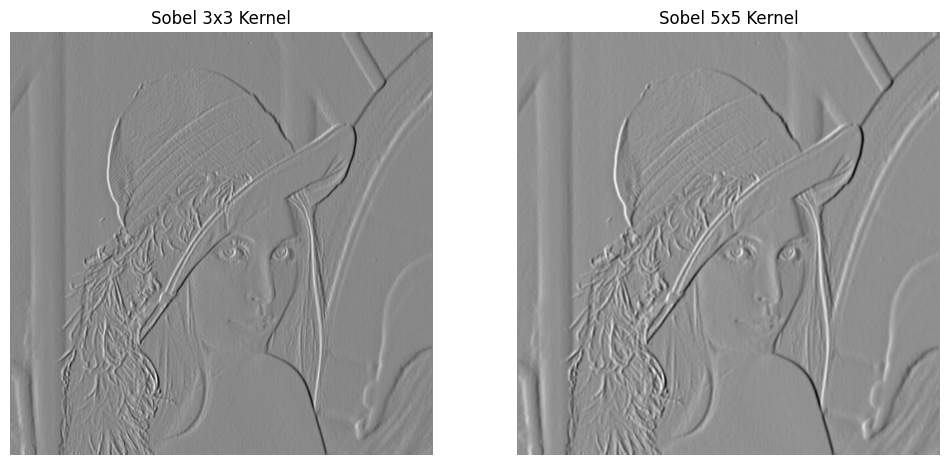

In [4]:
# Experiment with different kernel sizes (3x3, 5x5, etc.)

# Sobel operator with different kernel sizes
sobel_kernel_3x3 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_kernel_5x5 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

# Display results for different kernel sizes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sobel_kernel_3x3, cmap='gray')
plt.title('Sobel 3x3 Kernel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_kernel_5x5, cmap='gray')
plt.title('Sobel 5x5 Kernel')
plt.axis('off')
plt.show()

# Similarly, apply to Prewitt or Roberts operators by changing kernel size


## **STEP 13: VISUALIZING EDGE HISTOGRAMS**

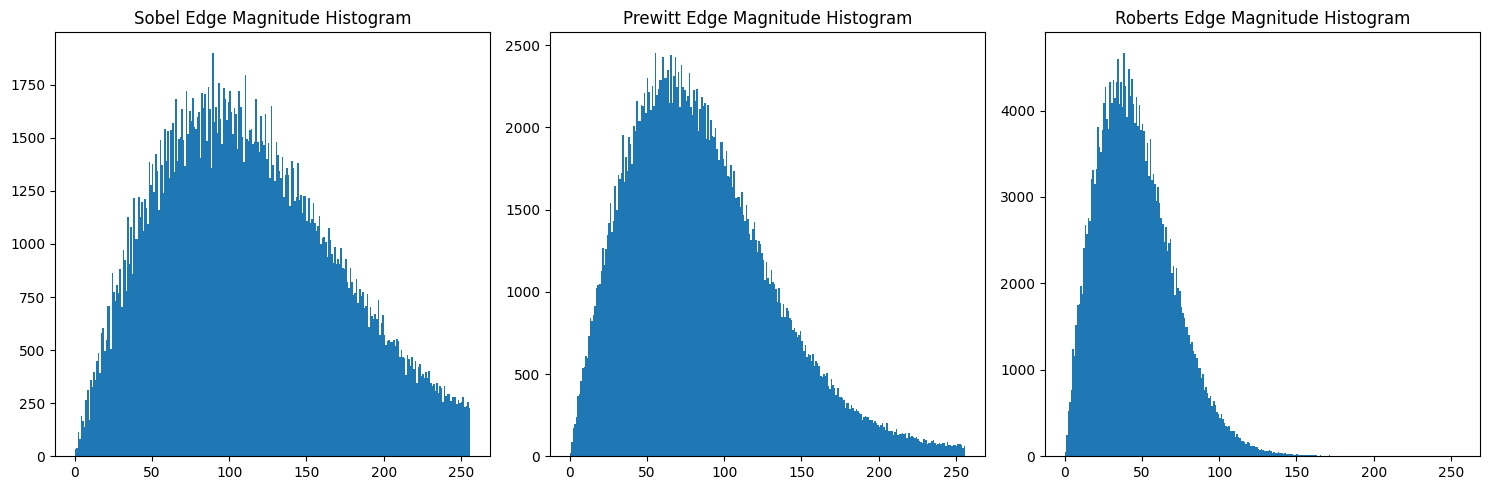

In [9]:
import cv2
import numpy as np
from scipy import ndimage  # Import the ndimage module

# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Ensure noisy_image is of type float32 or float64
noisy_image = noisy_image.astype(np.float32)  # or np.float64

# Calculate edge magnitude using Prewitt operator
prewitt_edge_x = cv2.filter2D(noisy_image, -1, prewitt_x)
prewitt_edge_y = cv2.filter2D(noisy_image, -1, prewitt_y)
prewitt_edge = cv2.magnitude(prewitt_edge_x, prewitt_edge_y)

# Calculate edge magnitude using Sobel operator for noisy image
sobel_x = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Calculate edge magnitude using Prewitt operator
prewitt_edge_x = cv2.filter2D(noisy_image, -1, prewitt_x)
prewitt_edge_y = cv2.filter2D(noisy_image, -1, prewitt_y)
prewitt_edge = cv2.magnitude(prewitt_edge_x, prewitt_edge_y)

# Define Roberts kernels
roberts_x = np.array([[1, 0], [0, -1]])  # Define roberts_x kernel
roberts_y = np.array([[0, 1], [-1, 0]])  # Define roberts_y kernel

# Calculate edge magnitude using Roberts operator
roberts_edge_x = ndimage.convolve(noisy_image, roberts_x)
roberts_edge_y = ndimage.convolve(noisy_image, roberts_y)
roberts_edge = np.hypot(roberts_edge_x, roberts_edge_y)

# Plot histograms for each operator's edge strengths
plt.figure(figsize=(15, 5))

# Sobel Edge Magnitude Histogram
plt.subplot(1, 3, 1)
plt.hist(sobel_edge.ravel(), bins=256, range=(0, 256))
plt.title('Sobel Edge Magnitude Histogram')

# Prewitt Edge Magnitude Histogram
plt.subplot(1, 3, 2)
plt.hist(prewitt_edge.ravel(), bins=256, range=(0, 256))
plt.title('Prewitt Edge Magnitude Histogram')

# Roberts Edge Magnitude Histogram
plt.subplot(1, 3, 3)
plt.hist(roberts_edge.ravel(), bins=256, range=(0, 256))
plt.title('Roberts Edge Magnitude Histogram')

plt.tight_layout()
plt.show()